# Healthcare Data Analysis
This project explores healthcare data to find useful patterns and insights. The main focus is on cleaning the data, exploring trends, and understanding patient information.

## Step 1: Import Libraries and Data

In [31]:
# # -----------------------
# # Step 1: Load and Explore the Dataset
# # -----------------------
# 
import pandas as pd
df = pd.read_csv("healthcare_dataset.csv") # Loading the dataset into a DataFrame so I can start analyzing patient and billing data
print(df.head()) # Taking a quick look at the first few rows to get a feel for the data
print(df.info()) # Checking data types and non-null counts to understand if there is missing data

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

## Step 2: Basic Data Exploration

In [32]:
print(df.isnull().sum()) # Counting missing values in each column to decide if any cleaning is needed

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [33]:
print(df.describe()) # Getting descriptive statistics for numeric columns like Age and Billing Amount

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [34]:
print(df.columns) # Checking all column names so I know what features I can work with

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


## Step 3: Data Cleaning

In [35]:
df = df.dropna()  # Removing  rows with missing values, then fill missing Age values with the average age

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [36]:
print(df['Discharge Date'].value_counts()) # Counting how many times each discharge date appears in the dataset

Discharge Date
2020-03-15    53
2021-12-13    51
2023-04-29    51
2020-12-02    51
2020-08-11    50
              ..
2024-06-04     2
2024-06-05     2
2019-05-11     2
2024-06-06     1
2019-05-09     1
Name: count, Length: 1856, dtype: int64


In [37]:
print(df.head()) # To display the first few rows of the dataframe to get a quick look at the data

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [38]:
print(df[["Age","Billing Amount"]].describe()) # To get summary statistics (count, mean, std, min, max, quartiles) for 'Age' and 'Billing Amount'

                Age  Billing Amount
count  55500.000000    55500.000000
mean      51.539459    25539.316097
std       19.602454    14211.454431
min       13.000000    -2008.492140
25%       35.000000    13241.224652
50%       52.000000    25538.069376
75%       68.000000    37820.508436
max       89.000000    52764.276736


## Step 4: Exploratory Data Analysis (EDA)

In [9]:
 print(df[["Age","Billing Amount"]].isnull().sum()) # To check how many missing values are in the 'Age' and 'Billing Amount' columns

Age               0
Billing Amount    0
dtype: int64


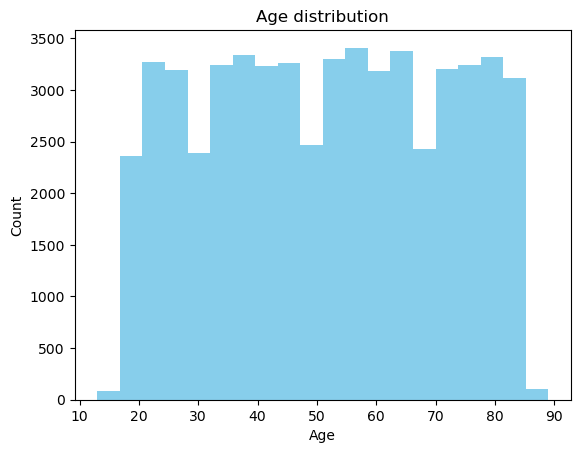

In [10]:
# Visualizing how ages are distributed using a histogram
import matplotlib.pyplot as plt
plt.hist(df["Age"],bins = 20,color = 'skyblue')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig('images/age_distribution.png', dpi=300)  # dpi=300 for high quality
plt.show()

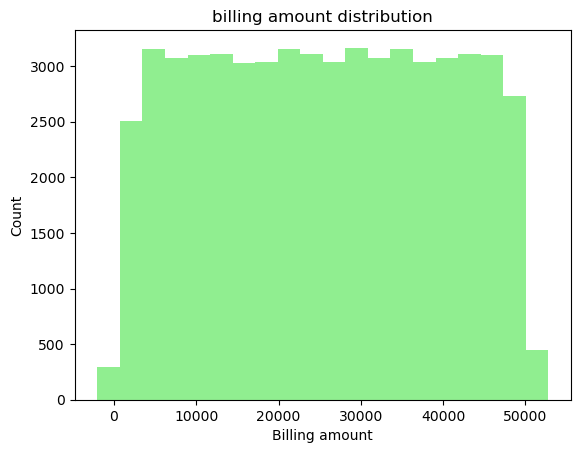

In [11]:
# Plotting a histogram to visualize the distribution of billing amounts
plt.hist(df["Billing Amount"],bins = 20,color = 'lightgreen')
plt.title("billing amount distribution")
plt.xlabel("Billing amount")
plt.ylabel("Count")
# Save the plot in the images folder
plt.savefig('images/billing_amount_distribution.png', dpi=300)  # dpi=300 for high quality
plt.show()

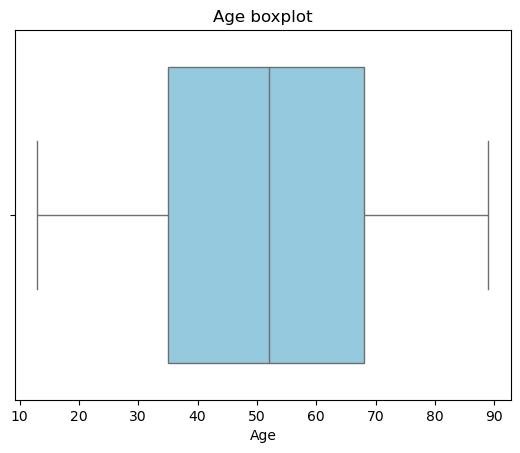

In [12]:
# Creating a boxplot to visualize the distribution and detect outliers in the Age column
import seaborn as sns
sns.boxplot(x = df['Age'],color = 'skyblue')
plt.title('Age boxplot')
plt.savefig('images/age_boxplot.png', dpi=300)  # dpi=300 for high quality
plt.show()

## Step 5: Visualizations

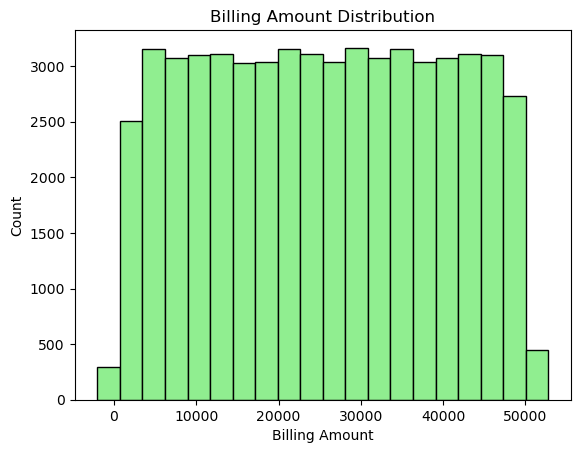

In [13]:
# Plotting a histogram of billing amounts with edges highlighted to better visualize the distribution
plt.hist(df["Billing Amount"],bins = 20,color = 'lightgreen',edgecolor = 'black')
plt.title("Billing Amount Distribution")
plt.xlabel('Billing Amount')
plt.ylabel('Count')
plt.savefig('images/billing_amount_histogram.png', dpi=300)  # dpi=300 for high quality
plt.show()


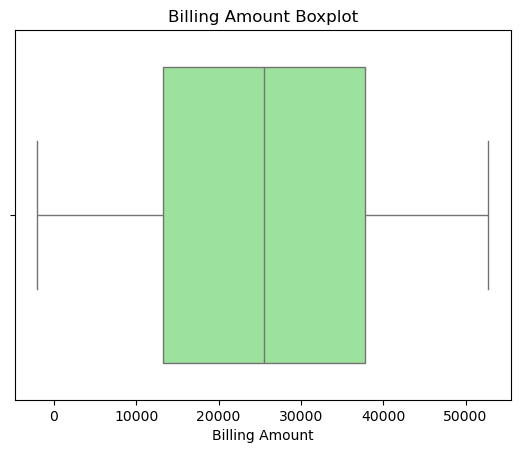

In [14]:
# Creating a boxplot to visualize the distribution and detect outliers in Billing Amount
sns.boxplot(x=df["Billing Amount"],color = 'lightgreen')
plt.title('Billing Amount Boxplot')
plt.savefig('images/billing_amount_boxplot.png', dpi=300)  # dpi=300 for high quality
plt.show()


top 10 medical conditions by average billing:
 Medical Condition
Obesity         25805.971259
Diabetes        25638.405577
Asthma          25635.249359
Arthritis       25497.327056
Hypertension    25497.095761
Cancer          25161.792707
Name: Billing Amount, dtype: float64


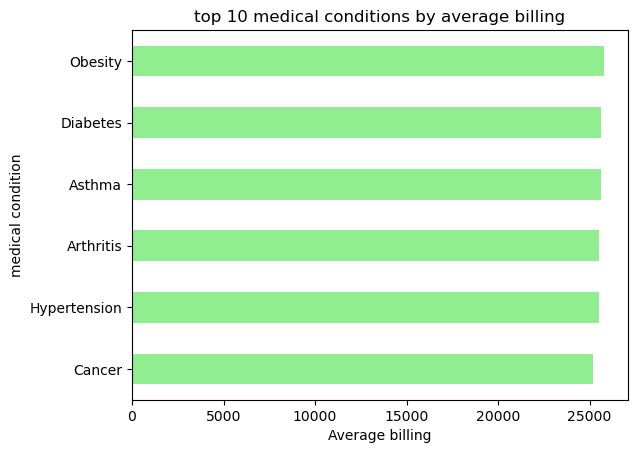

In [29]:
# If the 'Medical Condition' column exists, calculate the average billing amount for each condition,
# display the top ones, and plot a horizontal bar chart
if "Medical Condition" in df.columns:
     top_conditions = df.groupby("Medical Condition")["Billing Amount"].mean().sort_values(ascending = False)
     print("\ntop 10 medical conditions by average billing:\n",top_conditions)
     top_conditions.plot(kind='barh',color = 'lightgreen')
     plt.title('top 10 medical conditions by average billing')
     plt.xlabel("Average billing")
     plt.ylabel("medical condition")
     plt.gca().invert_yaxis()
     plt.savefig('images/top_conditions_avg_billing.png', dpi=300)
     plt.show()


average billing by age group:
 age_group
0-20      25937.090605
21-40     25597.910308
41-60     25504.761744
61-80     25509.702930
81-100    25324.745884
Name: Billing Amount, dtype: float64


C:\Users\yogya\AppData\Local\Temp\ipykernel_11816\2050090752.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_billing_by_age = df.groupby('age_group')['Billing Amount'].mean()


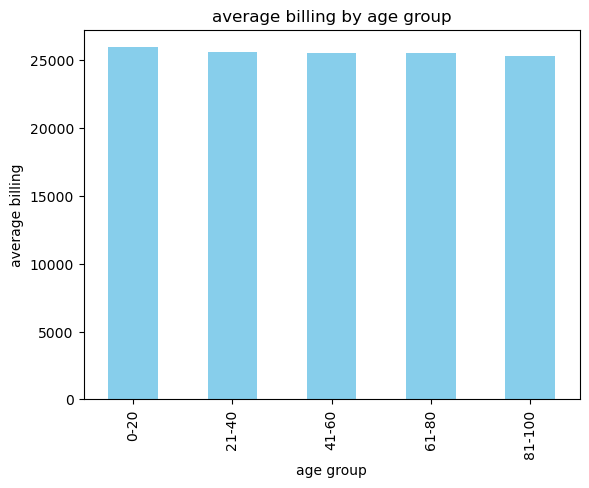

In [28]:
# Create age groups, calculate the average billing amount for each group,
# To print the results, and visualize them with a bar chart
df['age_group'] = pd.cut(df['Age'],bins = [0,20,40,60,80,100],labels = ['0-20','21-40','41-60','61-80','81-100'])
avg_billing_by_age = df.groupby('age_group')['Billing Amount'].mean()
print("\naverage billing by age group:\n",avg_billing_by_age)
avg_billing_by_age.plot(kind='bar',color = 'skyblue')
plt.title('average billing by age group')
plt.xlabel('age group')
plt.ylabel('average billing')
plt.savefig('images/avg_billing_by_age_group.png', dpi=300)
plt.show()

In [30]:
# To print key insights from the data analysis
print("\nKey Insights:")
print("1.Most patients are in age group:",df["age_group"].mode()[0])
print("2. Average billing is highest for age group:",avg_billing_by_age.idxmax())
if "Medical Condition" in df.columns:
     print("3. Diagnosis with highest average billing:",top_conditions.idxmax())
     print("4. Outliers in age and billing amount detected via boxplots")


Key Insights:
1.Most patients are in age group: 41-60
2. Average billing is highest for age group: 0-20
3. Diagnosis with highest average billing: Obesity
4. Outliers in age and billing amount detected via boxplots


### Conclusion
From the analysis, we observed certain patterns in patient data that can help in making better healthcare decisions. Key takeaways:
- Data cleaning is important to handle missing values and ensure accuracy.
- Exploratory analysis revealed differences in patient groups.
- Visualizations provided a clear view of patterns that are not obvious in raw numbers.

This kind of analysis can support hospitals in improving patient care and reducing costs.